<a href="https://colab.research.google.com/github/AhmadJer99/AppTrainers.FirstAssignment/blob/main/TrafficAnalysis-AhmadJerjees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AppTrainers's first assignment.
# By Ahmad Jerjees.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('traffic.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [7]:
df.shape

(2976, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [9]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


---

# 1.Vehicle Distribution Analysis

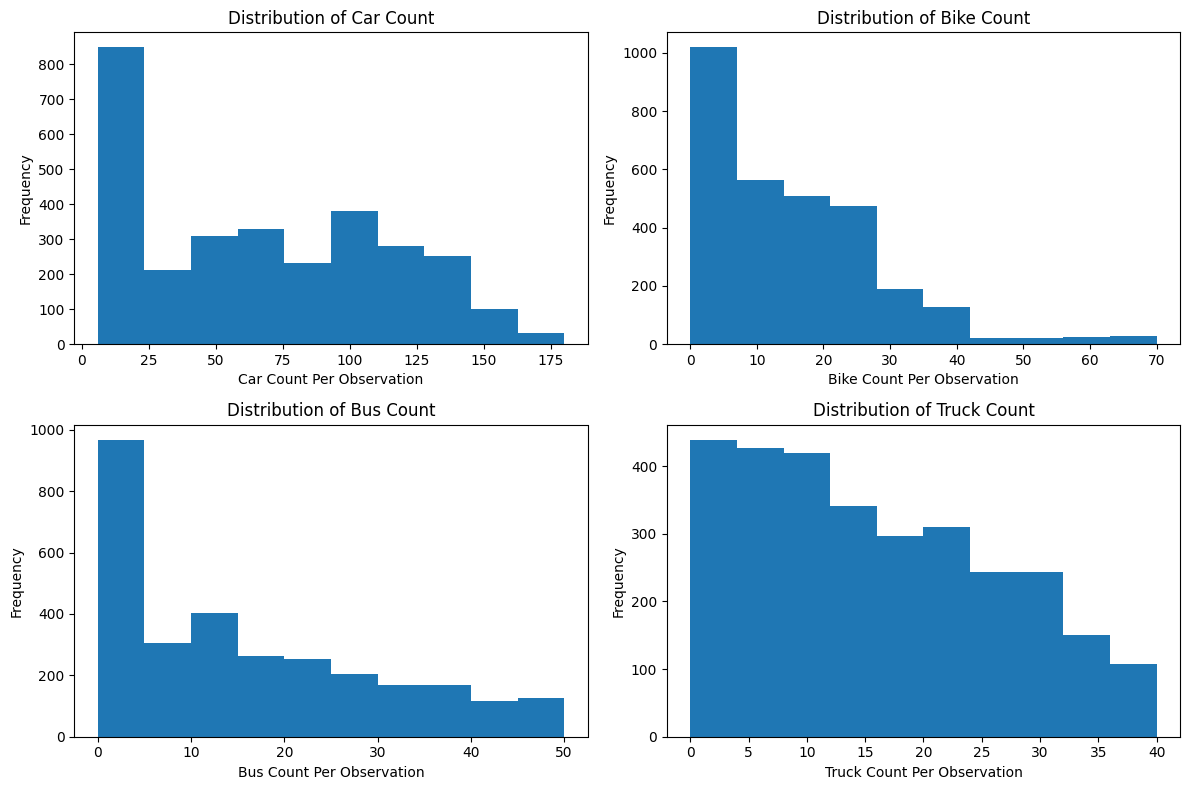

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))


axes[0, 0].hist(df['CarCount'])
axes[0, 0].set_xlabel('Car Count Per Observation')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Car Count')

axes[0, 1].hist(df['BikeCount'])
axes[0, 1].set_xlabel('Bike Count Per Observation')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Bike Count')

axes[1, 0].hist(df['BusCount'])
axes[1, 0].set_xlabel('Bus Count Per Observation')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Bus Count')

axes[1, 1].hist(df['TruckCount'])
axes[1, 1].set_xlabel('Truck Count Per Observation')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Truck Count')

plt.tight_layout()

plt.show()


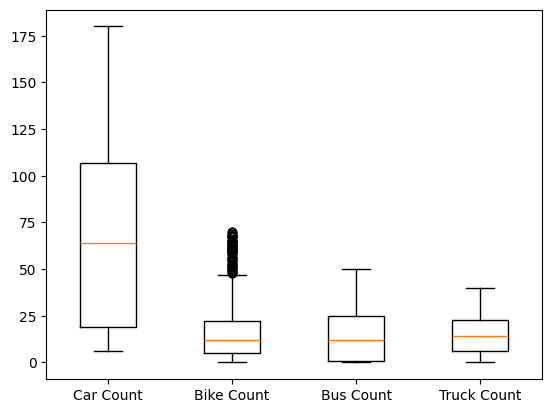

In [11]:
plt.boxplot([df['CarCount'], df['BikeCount'], df['BusCount'], df['TruckCount']])
plt.xticks([1, 2, 3, 4], ['Car Count', 'Bike Count', 'Bus Count', 'Truck Count'])
print()

---

# 2. Traffic Situation Distribution

Text(0.5, 1.0, 'Traffic Status Distribution')

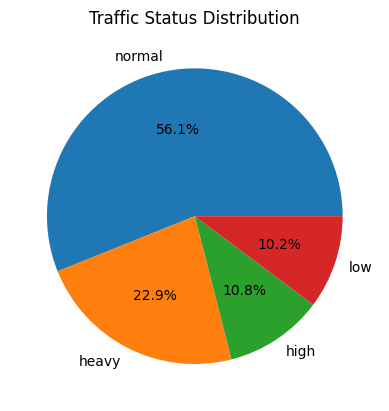

In [12]:
situation_counts = df['Traffic Situation'].value_counts()
plt.pie(situation_counts, labels=situation_counts.index, autopct='%1.1f%%')
plt.title('Traffic Status Distribution')

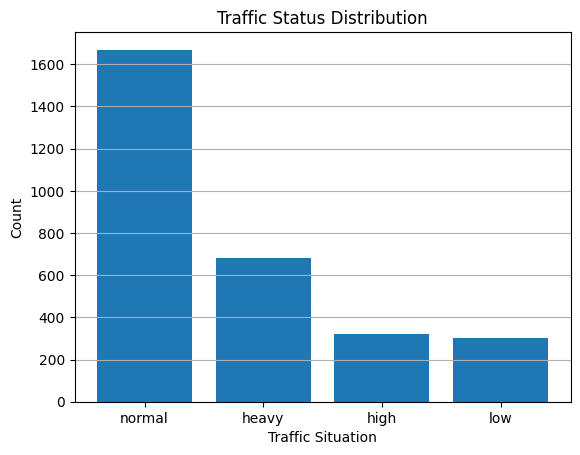

In [13]:
plt.bar(df['Traffic Situation'].value_counts().index, df['Traffic Situation'].value_counts())
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.title('Traffic Status Distribution')
plt.grid(axis='y')

---

# 3. Variation by Day of the Week

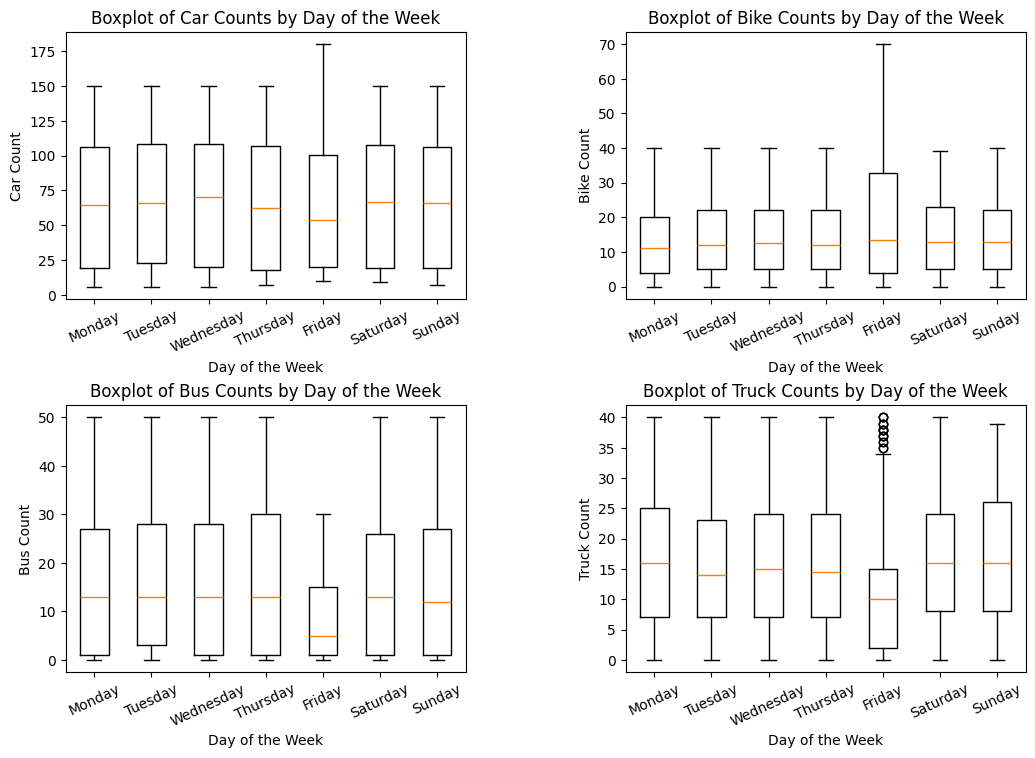

In [14]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

df['Day of the week'] = pd.Categorical(df['Day of the week'], categories=days_order, ordered=True)

totalCarCountPerDay = df.groupby(['Day of the week'],observed=True)['CarCount'].apply(list)
axes[0, 0].boxplot(totalCarCountPerDay)
axes[0, 0].set_xticks([1, 2, 3, 4,5,6,7], days_order,rotation=25)
axes[0, 0].set_title("Boxplot of Car Counts by Day of the Week")
axes[0, 0].set_xlabel("Day of the Week")
axes[0, 0].set_ylabel("Car Count")

totalBikeCountPerDay = df.groupby(['Day of the week'],observed=True)['BikeCount'].apply(list)
axes[0, 1].boxplot(totalBikeCountPerDay)
axes[0, 1].set_xticks([1, 2, 3, 4,5,6,7], days_order,rotation=25)
axes[0, 1].set_title("Boxplot of Bike Counts by Day of the Week")
axes[0, 1].set_xlabel("Day of the Week")
axes[0, 1].set_ylabel("Bike Count")

totalBusCountPerDay = df.groupby(['Day of the week'],observed=True)['BusCount'].apply(list)
axes[1, 0].boxplot(totalBusCountPerDay)
axes[1, 0].set_xticks([1, 2, 3, 4,5,6,7], days_order,rotation=25)
axes[1, 0].set_title("Boxplot of Bus Counts by Day of the Week")
axes[1, 0].set_xlabel("Day of the Week")
axes[1, 0].set_ylabel("Bus Count")

totalTruckCountPerDay = df.groupby(['Day of the week'],observed=True)['TruckCount'].apply(list)
axes[1, 1].boxplot(totalTruckCountPerDay)
axes[1, 1].set_xticks([1, 2, 3, 4,5,6,7], days_order,rotation=25)
axes[1, 1].set_title("Boxplot of Truck Counts by Day of the Week")
axes[1, 1].set_xlabel("Day of the Week")
axes[1, 1].set_ylabel("Truck Count")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)

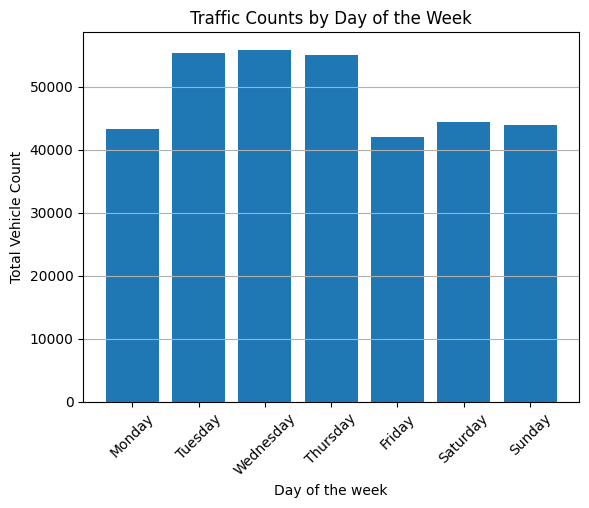

In [15]:
daily_totals = df.groupby('Day of the week',observed=True)['Total'].sum()
plt.bar(daily_totals.index, daily_totals.values)
plt.xticks(rotation=45)
plt.xlabel('Day of the week')
plt.ylabel('Total Vehicle Count')
plt.title('Traffic Counts by Day of the Week')
plt.grid(axis='y')

---

# 4. Car Count vs. Traffic Situation

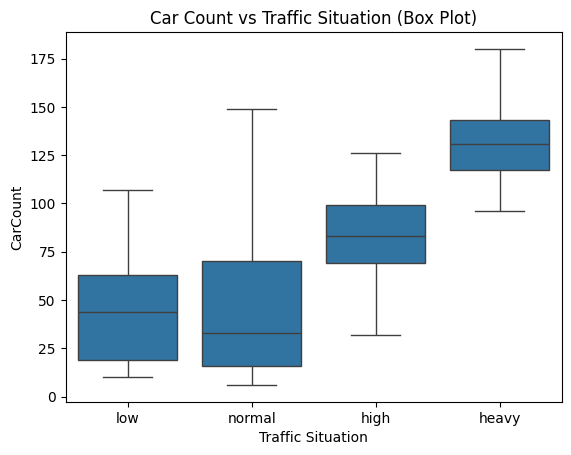

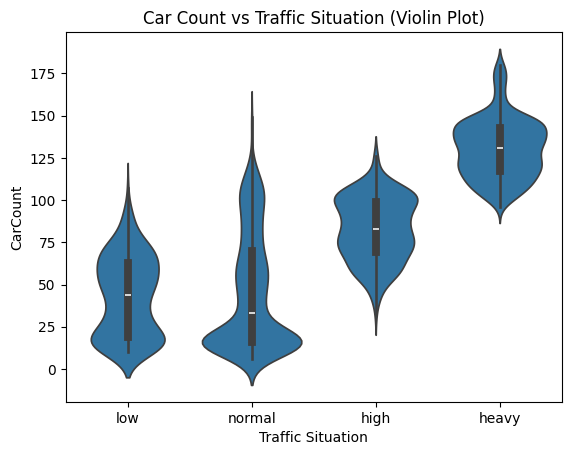

In [16]:
situation_order = ['low', 'normal', 'high', 'heavy']

df['Traffic Situation'] = pd.Categorical(df['Traffic Situation'], categories=situation_order, ordered=True)

sns.boxplot(x='Traffic Situation', y='CarCount', data=df)
plt.title('Car Count vs Traffic Situation (Box Plot)')
plt.show()
sns.violinplot(x='Traffic Situation', y='CarCount', data=df)
plt.title('Car Count vs Traffic Situation (Violin Plot)')
plt.show()

---

# 5. Bike Count vs. Traffic Situation





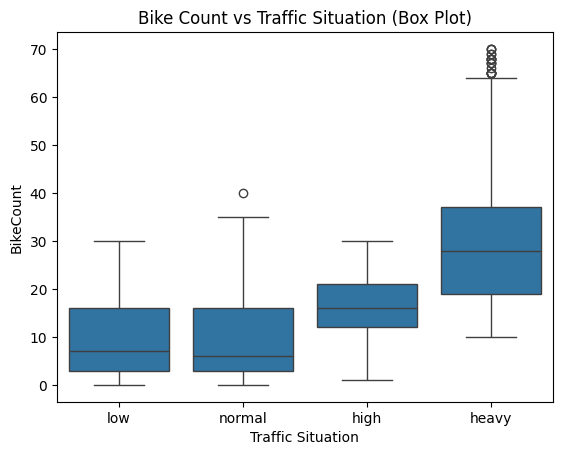

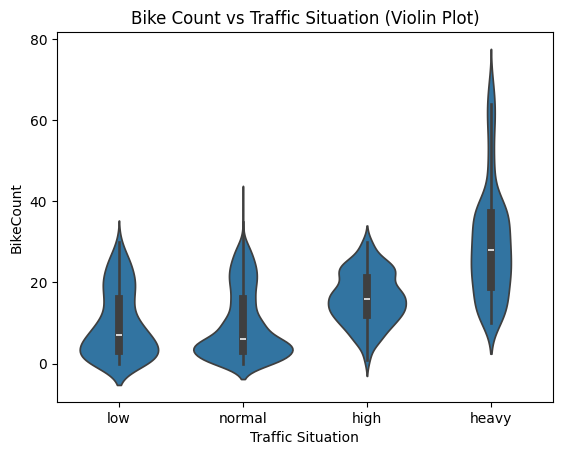

In [17]:
sns.boxplot(x='Traffic Situation', y='BikeCount', data=df)
plt.title('Bike Count vs Traffic Situation (Box Plot)')
plt.show()
sns.violinplot(x='Traffic Situation', y='BikeCount', data=df)
plt.title('Bike Count vs Traffic Situation (Violin Plot)')
plt.show()



---

# 6. Bus Count vs. Traffic Situation

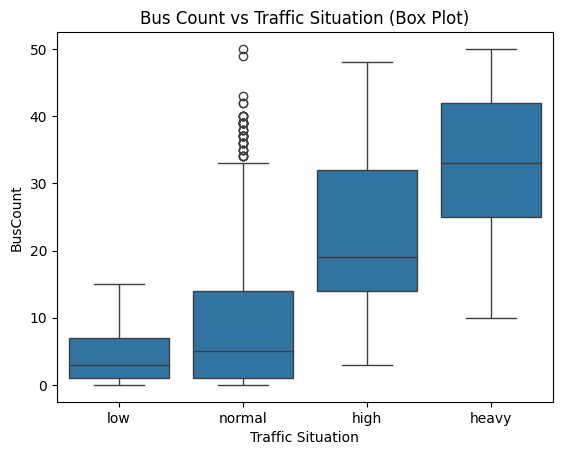

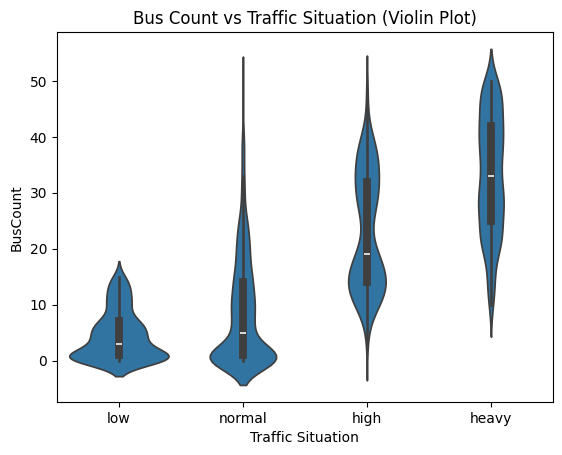

In [18]:
sns.boxplot(x='Traffic Situation', y='BusCount', data=df)
plt.title('Bus Count vs Traffic Situation (Box Plot)')
plt.show()
sns.violinplot(x='Traffic Situation', y='BusCount', data=df)
plt.title('Bus Count vs Traffic Situation (Violin Plot)')
plt.show()



---

# 7. Truck Count vs. Traffic Situation

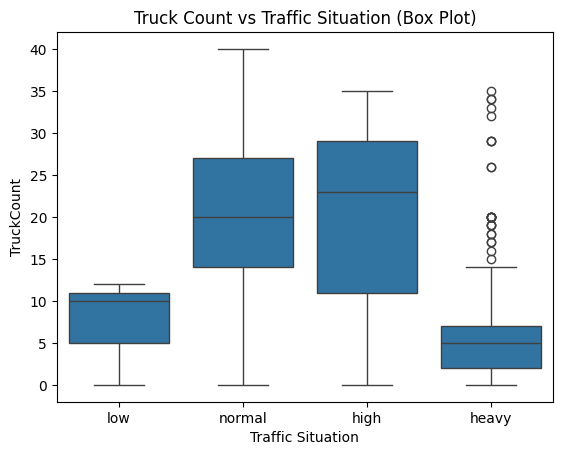

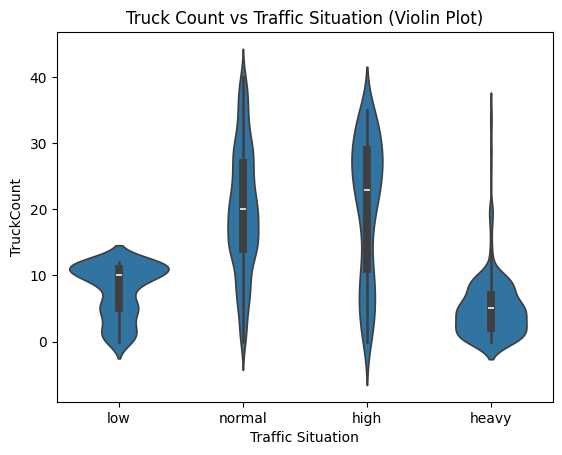

In [19]:
sns.boxplot(x='Traffic Situation', y='TruckCount', data=df)
plt.title('Truck Count vs Traffic Situation (Box Plot)')
plt.show()
sns.violinplot(x='Traffic Situation', y='TruckCount', data=df)
plt.title('Truck Count vs Traffic Situation (Violin Plot)')
plt.show()



---

# 8. Total Vehicle and Count Traffic Situation

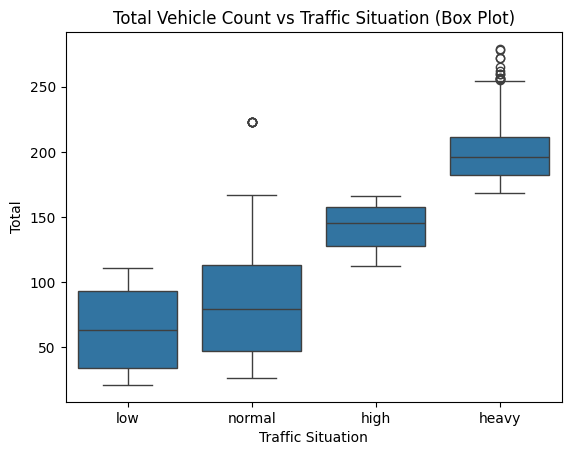

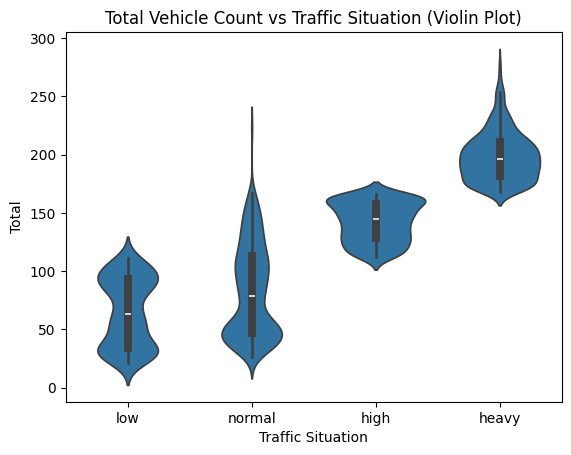

In [20]:
sns.boxplot(x='Traffic Situation', y='Total', data=df)
plt.title('Total Vehicle Count vs Traffic Situation (Box Plot)')
plt.show()
sns.violinplot(x='Traffic Situation', y='Total', data=df)
plt.title('Total Vehicle Count vs Traffic Situation (Violin Plot)')
plt.show()



---

# 9. Busiest Hours of the Day

In [21]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [22]:
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p')
df["Hour"] = df['Time'].dt.hour

<Axes: ylabel='Hour'>

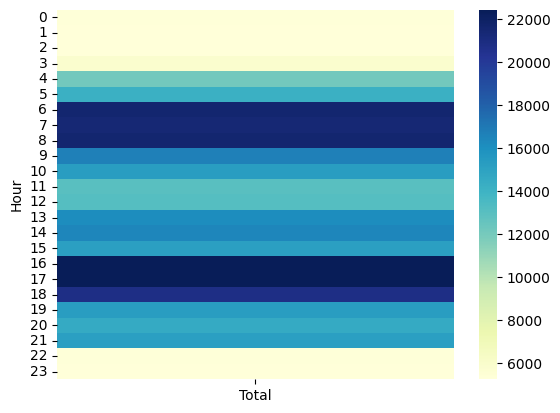

In [23]:
totalVehiclesGroupedByTime = df.groupby('Hour',observed=True)['Total'].sum()
sns.heatmap(totalVehiclesGroupedByTime.to_frame(), cmap='YlGnBu')

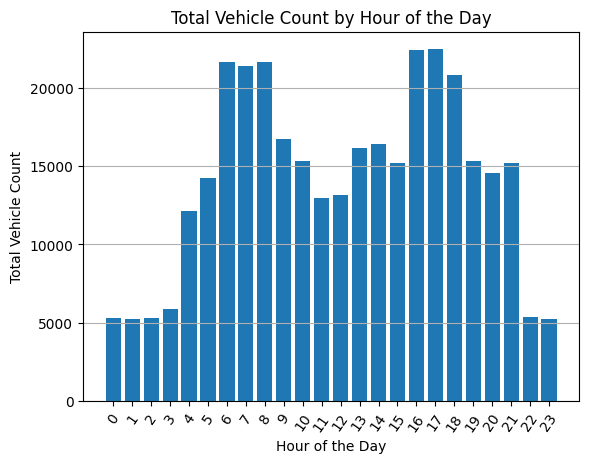

In [24]:
plt.bar(totalVehiclesGroupedByTime.index, totalVehiclesGroupedByTime.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Vehicle Count')
plt.title('Total Vehicle Count by Hour of the Day')
plt.xticks(totalVehiclesGroupedByTime.index,rotation = 55)
plt.grid(axis='y')

10-Traffic Distrubtion by day of the week

In [30]:
traffic_mapping = {"low": 1, "medium": 2, "high": 3, "heavy": 4}
df["Traffic Numeric"] = df["Traffic Situation"].map(traffic_mapping)


C:\Users\AhmadJerjees\AppData\Local\Temp\ipykernel_1748\515111396.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  traffic_counts = df.groupby(['Day of the week', 'Traffic Situation']).size()
C:\Users\AhmadJerjees\AppData\Local\Temp\ipykernel_1748\515111396.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Traffic Situation')


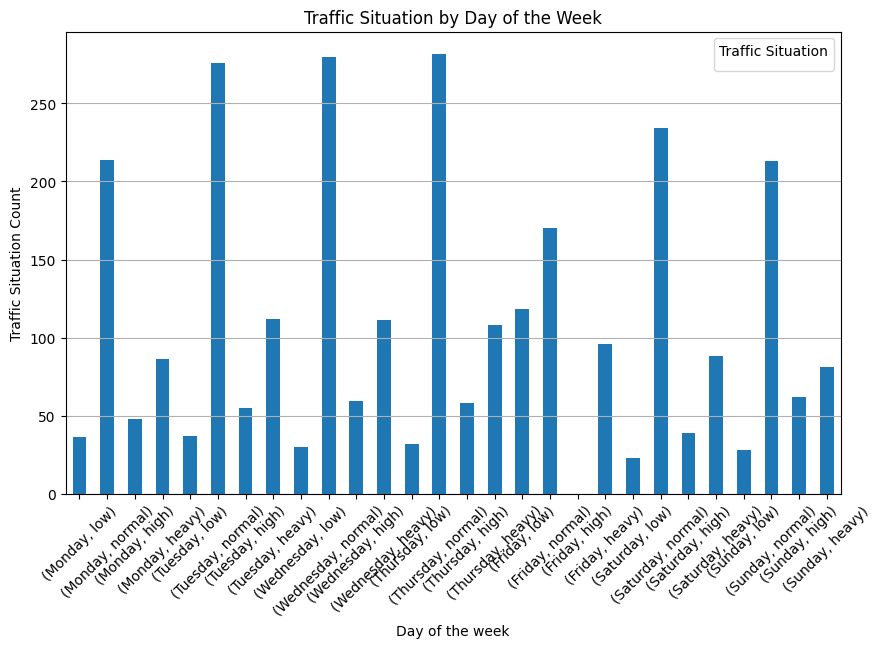

In [ ]:
import matplotlib.pyplot as plt

# Group by 'Day of the week' and 'Traffic Situation' to count occurrences
traffic_counts = df.groupby(['Day of the week', 'Traffic Situation']).size().unstack()

# Plot
traffic_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Day of the week')
plt.ylabel('Traffic Situation Count')
plt.title('Traffic Situation by Day of the Week')
plt.legend(title='Traffic Situation')
plt.grid(axis='y')
plt.show()
